In [1]:
import pandas as pd

In [2]:
df1 = pd.read_excel('New Inventory.xlsx')
df2 = pd.read_excel('Inventory Dataset.xlsx')

In [3]:
# Merging the two datasets on 'Item Number'
merged_df = pd.merge(df1, df2, on='Item Number', how='outer')

In [4]:
# Converting 'Date' and 'Inventory Receive' to datetime objects
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df['Inventory Receive'] = pd.to_datetime(merged_df['Inventory Receive'])

In [5]:
# Creating a date range for the future dates on a weekly basis
future_dates = pd.date_range(start='6/17/2023', periods=12, freq='W')

In [6]:
# Creating a new DataFrame for the table with future dates
future_table = pd.DataFrame(index=merged_df['Item Number'], columns=future_dates)

In [7]:
# Populating the table with inventory levels at different dates in the future
for index, row in merged_df.iterrows():
    item_number = row['Item Number']
    receive_date = row['Inventory Receive']
    total_qty = row['Total Item Qty']
    current_date = row['Date']
    inventory = row['Inventory']

    # Calculating the weekly increase in inventory
    weekly_increase = total_qty / ((receive_date - current_date).days // 7)

    # Populating the table with inventory levels at different future dates
    for date in future_dates:
        if date >= current_date:
            future_table.loc[item_number, date] = inventory
            inventory += weekly_increase


In [8]:
# Filling NaN values with 0
future_table = future_table.fillna(0)

future_table.head()

,2023-06-18,2023-06-25,2023-07-02,2023-07-09,2023-07-16,2023-07-23,2023-07-30,2023-08-06,2023-08-13,2023-08-20,2023-08-27,2023-09-03
Item Number,,,,,,,,,,,,
064-13-0002,9599.0,9739.0,9879.0,10019.0,10159.0,10299.0,10439.0,10579.0,10719.0,10859.0,10999.0,11139.0
064-13-0002,9599.0,9739.0,9879.0,10019.0,10159.0,10299.0,10439.0,10579.0,10719.0,10859.0,10999.0,11139.0
064-13-0002,9599.0,9739.0,9879.0,10019.0,10159.0,10299.0,10439.0,10579.0,10719.0,10859.0,10999.0,11139.0
064-13-0002,9599.0,9739.0,9879.0,10019.0,10159.0,10299.0,10439.0,10579.0,10719.0,10859.0,10999.0,11139.0
064-13-0338,6234.0,6473.5,6713.0,6952.5,7192.0,7431.5,7671.0,7910.5,8150.0,8389.5,8629.0,8868.5


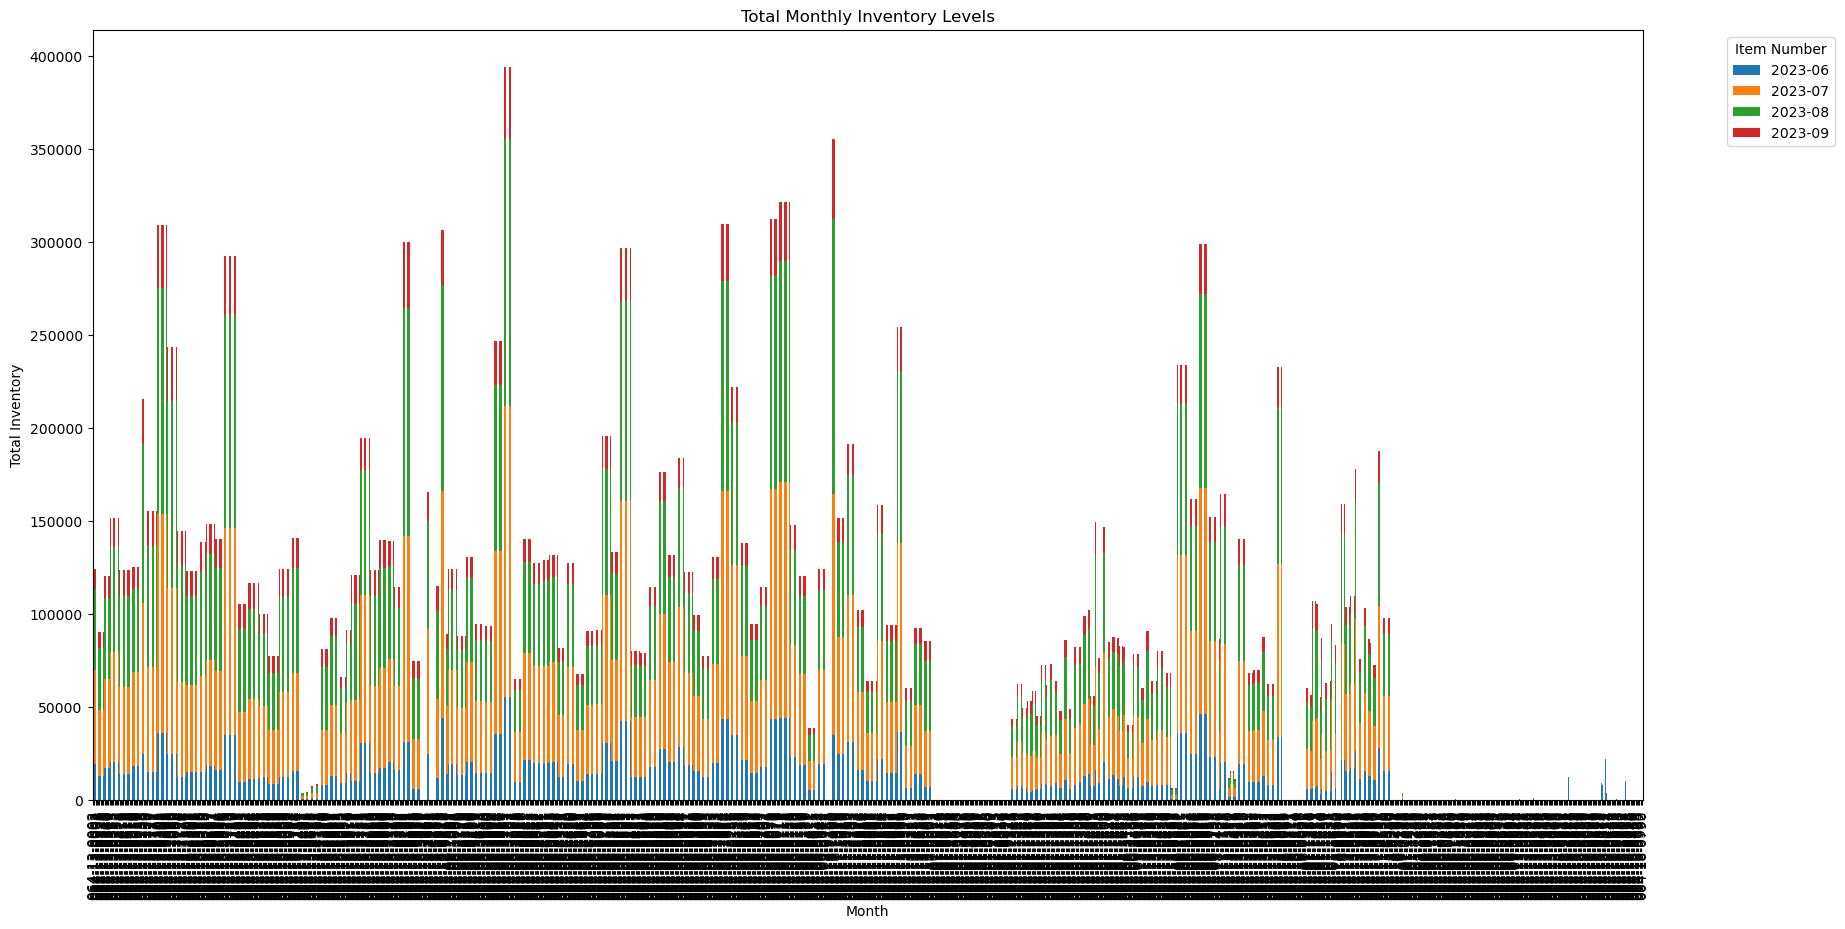

In [9]:
import matplotlib.pyplot as plt

# Grouping the future_table by month and summing the inventory levels
monthly_totals = future_table.groupby(future_table.columns.to_period("M"), axis=1).sum()

# Plotting the bar chart
monthly_totals.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Total Monthly Inventory Levels')
plt.xlabel('Month')
plt.ylabel('Total Inventory')
plt.legend(title='Item Number', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
